In [1]:
import pandas as pd
import requests
import time

# Function to fetch JSON on update-nature
def fetch_update_nature(doi):
    url = f"https://api.labs.crossref.org/works/{doi}?mailto=christian.hauschke@tib.eu"
    response = requests.get(url)
    if response.status_code == 200:
        json_data = response.json()
        updates = json_data.get('message', {}).get('cr-labs-updates', [])
        return ";".join([update.get('update-nature') for update in updates])
    else:
        return ""

# Read CSV file and start from specified line/DOI
csv_filename = "OpenAlex_retractions.csv"
start_line = 13000  # Set to the line number/DOI from which to start
batch_size = 250
openalexexport_df = pd.read_csv(csv_filename, skiprows=range(1, start_line), nrows=batch_size)

# Extend DataFrame with update_nature column
openalexexport_df['update_nature'] = openalexexport_df['doi'].apply(fetch_update_nature)

# Export CSV file every X DOIs (batchsize)
while not openalexexport_df.empty:
    export_filename = f"retraction_metadata_{start_line + len(openalexexport_df)}.csv"
    openalexexport_df.to_csv(export_filename, index=False)
    print(f"Exported to {export_filename}")
    time.sleep(2)  # Wait for 2 seconds before exporting next batch
    start_line += batch_size
    openalexexport_df = pd.read_csv(csv_filename, skiprows=range(1, start_line), nrows=batch_size)
    openalexexport_df['update_nature'] = openalexexport_df['doi'].apply(fetch_update_nature)



Exported to retraction_metadata_13250.csv
Exported to retraction_metadata_13500.csv
Exported to retraction_metadata_13750.csv
Exported to retraction_metadata_14000.csv
Exported to retraction_metadata_14250.csv
Exported to retraction_metadata_14500.csv
Exported to retraction_metadata_14750.csv
Exported to retraction_metadata_15000.csv
Exported to retraction_metadata_15250.csv
Exported to retraction_metadata_15500.csv
Exported to retraction_metadata_15750.csv
Exported to retraction_metadata_16000.csv
Exported to retraction_metadata_16250.csv
Exported to retraction_metadata_16500.csv
Exported to retraction_metadata_16750.csv
Exported to retraction_metadata_17000.csv
Exported to retraction_metadata_17250.csv
Exported to retraction_metadata_17500.csv
Exported to retraction_metadata_17750.csv
Exported to retraction_metadata_18000.csv
Exported to retraction_metadata_18250.csv
Exported to retraction_metadata_18500.csv
Exported to retraction_metadata_18750.csv
Exported to retraction_metadata_19

KeyboardInterrupt: 

In [7]:
import os

# Get the current working directory
directory = os.getcwd()

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Initialize an empty DataFrame to store merged data
merged_df = pd.DataFrame()

# Iterate over each CSV file and merge data
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(directory, csv_file))
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Export the merged DataFrame to a single CSV file
merged_filename = "merged_retraction_metadata.csv"
merged_df.to_csv(merged_filename, index=False)

print(f"Merged data exported to {merged_filename}")


Merged data exported to merged_retraction_metadata.csv


In [8]:
print(merged_df.head())

                                 id  \
0  https://openalex.org/W3001195213   
1  https://openalex.org/W1974047233   
2  https://openalex.org/W2118796952   
3  https://openalex.org/W3010930696   
4  https://openalex.org/W2166000498   

                                        display_name  \
0  Detection of 2019 novel coronavirus (2019-nCoV...   
1  DNA methylation age of human tissues and cell ...   
2  Chimeric Antigen Receptor T Cells for Sustaine...   
3  Hydroxychloroquine and azithromycin as a treat...   
4  Primary Prevention of Cardiovascular Disease w...   

                   primary_location_display_name  cited_by_count  \
0                               Eurosurveillance          5665.0   
1              GenomeBiology.com (London. Print)          4466.0   
2            The New England Journal of Medicine          4310.0   
3  International Journal of Antimicrobial Agents          3800.0   
4            The New England Journal of Medicine          3684.0   

                   

In [9]:
# Read the merged CSV file
merged_filename = "merged_retraction_metadata.csv"
df = pd.read_csv(merged_filename)

# Remove rows where update_nature is empty
df_filtered = df.dropna(subset=['update_nature'])

# Save the filtered DataFrame to a new CSV file
output_filename = "dois_with_update_nature.csv"
df_filtered.to_csv(output_filename, index=False)

print(f"Filtered data exported to {output_filename}")


C:\Users\christian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3505: DtypeWarning: Columns (8,14,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Filtered data exported to dois_with_update_nature.csv


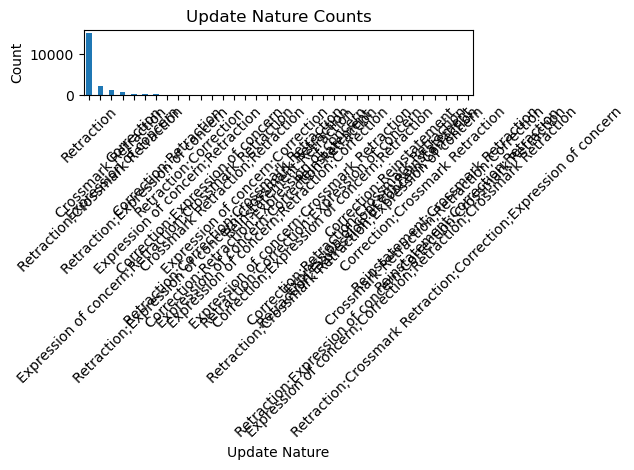

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_filename = "dois_with_update_nature.csv"
df = pd.read_csv(csv_filename)

# Count all values in update_nature
update_nature_counts = df['update_nature'].value_counts()

# Create a bar chart
update_nature_counts.plot(kind='bar')
plt.title('Update Nature Counts')
plt.xlabel('Update Nature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


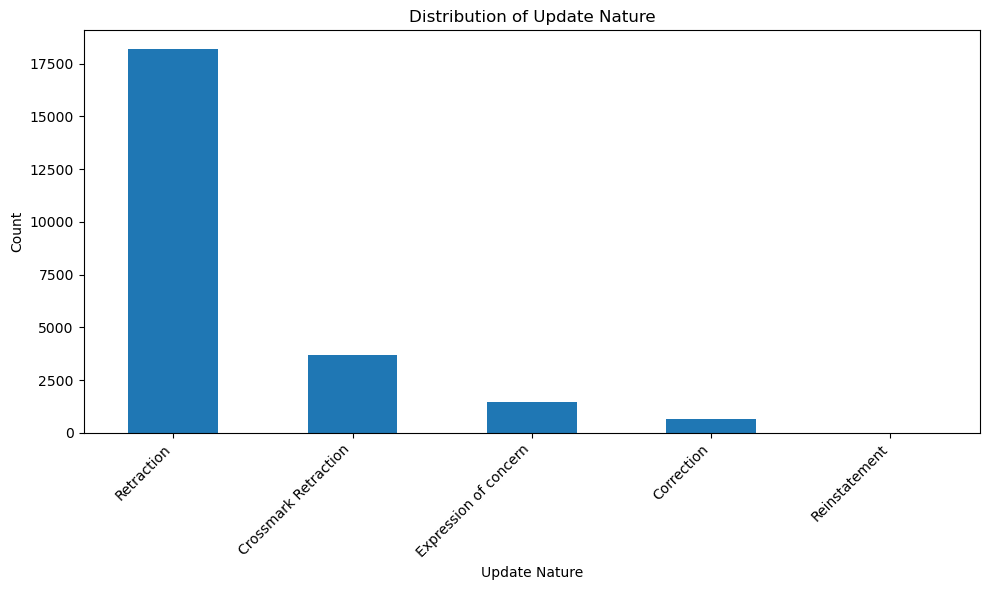

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv("dois_with_update_nature.csv")

# Convert non-string values to strings in the 'update_nature' column
df['update_nature'] = df['update_nature'].astype(str)

# Split the values in the 'update_nature' column where there are multiple values separated by a semicolon
update_nature_split = df['update_nature'].str.split(';')

# Flatten the list of lists
update_nature_list = [item.strip() for sublist in update_nature_split.dropna() for item in sublist]

# Count the occurrences of each unique update nature value
update_nature_counts = pd.Series(update_nature_list).value_counts()

# Plot the distribution of update nature values
plt.figure(figsize=(10, 6))
update_nature_counts.plot(kind='bar')
plt.title('Distribution of Update Nature')
plt.xlabel('Update Nature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("dois_with_update_nature.csv")

# Count the total number of papers
total_papers = df['doi'].notnull().sum()
print("Number of papers:", total_papers)

# Split the values in the 'update_nature' column where there are multiple values separated by a semicolon
update_nature_split = df['update_nature'].str.split(';')

# Create a new DataFrame where each row corresponds to a single update nature term for each paper
update_nature_df = pd.DataFrame(update_nature_split.explode())

# Count the occurrences of each update nature term
update_nature_counts = update_nature_df['update_nature'].value_counts()

# Print the analysis
print("\nAnalysis of Update Nature:")
print(update_nature_counts)


Number of papers: 20486

Analysis of Update Nature:
Retraction               18166
Crossmark Retraction      3711
Expression of concern     1437
Correction                 646
Reinstatement               11
Name: update_nature, dtype: int64


Number of papers with more than one update-nature: 82


There are duplicate rows.


In [21]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Print the DataFrame without duplicate rows
print(df_no_duplicates)

# Count the number of duplicate rows
duplicate_rows_count = df.duplicated().sum()

# Check if there are duplicate rows
if duplicate_rows_count > 0:
    print("There are duplicate rows.")
else:
    print("There are no duplicate rows.")


                                     id  \
0      https://openalex.org/W3001195213   
1      https://openalex.org/W1974047233   
2      https://openalex.org/W2118796952   
3      https://openalex.org/W3010930696   
4      https://openalex.org/W2166000498   
...                                 ...   
20481  https://openalex.org/W2342636848   
20482  https://openalex.org/W2467400447   
20483  https://openalex.org/W2470410643   
20484  https://openalex.org/W2471410568   
20485  https://openalex.org/W2490412079   

                                            display_name  \
0      Detection of 2019 novel coronavirus (2019-nCoV...   
1      DNA methylation age of human tissues and cell ...   
2      Chimeric Antigen Receptor T Cells for Sustaine...   
3      Hydroxychloroquine and azithromycin as a treat...   
4      Primary Prevention of Cardiovascular Disease w...   
...                                                  ...   
20481  Notice of Retraction: The Research and Applica...   
204

In [22]:
df = df_no_duplicates

df = df.drop(columns=['ab', 'bc'])

# Print the modified DataFrame
df)

KeyError: "['ab', 'bc'] not found in axis"

In [23]:
# Count the occurrences of each DOI
doi_counts = df['doi'].value_counts()

# Count the number of papers with more than one update nature
papers_with_multiple_update_nature = (doi_counts > 1).sum()

print("Number of papers with more than one update-nature:", papers_with_multiple_update_nature)

# Count the total number of papers
total_papers = df['doi'].notnull().sum()
print("Number of papers:", total_papers)

# Split the values in the 'update_nature' column where there are multiple values separated by a semicolon
update_nature_split = df['update_nature'].str.split(';')

# Create a new DataFrame where each row corresponds to a single update nature term for each paper
update_nature_df = pd.DataFrame(update_nature_split.explode())

# Count the occurrences of each update nature term
update_nature_counts = update_nature_df['update_nature'].value_counts()

# Print the analysis
print("\nAnalysis of Update Nature:")
print(update_nature_counts)

Number of papers with more than one update-nature: 2
Number of papers: 20406

Analysis of Update Nature:
Retraction               18109
Crossmark Retraction      3690
Expression of concern     1435
Correction                 645
Reinstatement               11
Name: update_nature, dtype: int64
